In [1]:
#import libraries
import numpy as np
import pickle as pkl
from torchvision.models import resnet50
from sklearn.neighbors import NearestNeighbors

import scipy.io as sio
from google.colab import drive
import matplotlib.pyplot as plt
import numpy as np
import torch
from PIL import Image
import torch.nn as nn
import zipfile
import torchvision.transforms as tf



ModuleNotFoundError: No module named 'google.colab'

In [ ]:
# Mount Google Drive
drive.mount('/content/drive')
data_path = '/content/drive/MyDrive/finalproject_DL/'
results_path = '/content/drive/MyDrive/finalproject_DL/Results/'


In [87]:
model = resnet50(pretrained=True)

# Remove the fully connected layer (classification layer)
modules = list(model.children())[:-1]
model = torch.nn.Sequential(*modules)

# Set the model to evaluation mode
model.eval()

# Set all parameters to be non-trainable
for param in model.parameters():
    param.requires_grad = False


/usr/local/lib/python3.10/dist-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=ResNet50_Weights.IMAGENET1K_V1`. You can also use `weights=ResNet50_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)


In [16]:
def read_images_from_directory(directory_path):
    image_files = []
    for filename in os.listdir(directory_path):
          image_files.append(os.path.join(directory_path, filename))
    return image_files

images = read_images_from_directory(data_path + "archive.zip (Unzipped Files)/images/")

In [76]:
import os
filenames = []
for file in os.listdir(data_path + 'images'):
    filenames.append(os.path.join('images',file))

# Example usage
print(len(filenames))

25227


In [119]:
# Compose a series of transformations that will be applied to the images
tr = tf.Compose([
    tf.Resize((224, 224)),
    tf.Grayscale(num_output_channels=3),  # Convert to 3 channels (RGB)
    tf.ToTensor(),  # Converts an image loaded in range [0, 255] to a torch.Tensor in range [0.0, 1.0]
    tf.Normalize(mean= [0.485, 0.456, 0.406] , std=[0.229, 0.224, 0.225]),  # Normalizes using imageNet mean, std values
])

In [121]:

def extract_features_from_images(image_path, model, tr):


    img = Image.open(image_path)
    img = tr(img).unsqueeze(0)  # Add a batch dimension
    #display(tf.ToPILImage()(img.squeeze(0)))

    # Extract features using the model
    with torch.no_grad():
        features = model(img)

    # Flatten the features tensor
    flattened_features = features.flatten()

    # Normalize the features
    norm_features = flattened_features / torch.norm(flattened_features)

    return norm_features



In [107]:
feat1 = extract_features_from_images(data_path + filenames[0], model, tr)
print(feat1.shape)

torch.Size([2048])


In [123]:
image_features = []
for img in filenames:
  feature = extract_features_from_images(data_path + img, model, tr)
  image_features.append(feature)

In [124]:
image_features = pkl.dump(image_features, open('Images_features.pkl','wb'))

In [146]:
file_path = os.path.abspath('Images_features.pkl')
print("The file will be stored at:", file_path)

The file will be stored at: /content/Images_features.pkl


In [125]:
filenames = pkl.dump(filenames, open('filenames.pkl','wb'))

In [126]:
Image_features = pkl.load(open('Images_features.pkl','rb'))

In [127]:
filenames = pkl.load(open('filenames.pkl','rb'))

In [128]:
neighbors = NearestNeighbors(n_neighbors=6, algorithm='brute', metric='euclidean')

In [129]:
neighbors.fit(Image_features)

NearestNeighbors(algorithm='brute', metric='euclidean', n_neighbors=6)

In [134]:
input_image = extract_features_from_images(data_path+'images/1163.jpg',model,tr)

In [135]:
distance,indices = neighbors.kneighbors([input_image])

In [136]:
indices[0]

array([23654,  5918, 21945,  8357, 20767, 24482])

In [137]:
from IPython.display import Image

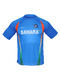

In [139]:
Image(data_path+'images/1163.jpg')

In [141]:
print(filenames)

['images/39118.jpg', 'images/39184.jpg', 'images/39776.jpg', 'images/39845.jpg', 'images/38846.jpg', 'images/39629.jpg', 'images/38825.jpg', 'images/38942.jpg', 'images/39664.jpg', 'images/39249.jpg', 'images/39676.jpg', 'images/39221.jpg', 'images/39011.jpg', 'images/39844.jpg', 'images/38939.jpg', 'images/39697.jpg', 'images/39709.jpg', 'images/39732.jpg', 'images/39340.jpg', 'images/39058.jpg', 'images/39196.jpg', 'images/39307.jpg', 'images/3982.jpg', 'images/39881.jpg', 'images/39269.jpg', 'images/39206.jpg', 'images/39371.jpg', 'images/39475.jpg', 'images/39841.jpg', 'images/39658.jpg', 'images/38850.jpg', 'images/39127.jpg', 'images/39640.jpg', 'images/39512.jpg', 'images/39198.jpg', 'images/39459.jpg', 'images/39493.jpg', 'images/39663.jpg', 'images/39492.jpg', 'images/39792.jpg', 'images/39667.jpg', 'images/39365.jpg', 'images/39810.jpg', 'images/39144.jpg', 'images/39186.jpg', 'images/39169.jpg', 'images/39199.jpg', 'images/39596.jpg', 'images/39289.jpg', 'images/39330.jpg', 

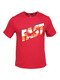

In [145]:
Image(data_path+filenames[indices[0][4]])

In [70]:
# def apply_transformations(image_paths, transform):
#     transformed_images = []
#     i = 0
#     for image_path in image_paths:
#         image = Image.open(image_path).convert('RGB')  # Open the image and convert to RGB
#         transformed_image = transform(image)  # Apply the transformations
#         transformed_images.append(transformed_image)
#         i += 1
#         image.close()
#         if (i % 1000 == 0):
#           print(i)

#     return torch.stack(transformed_images)  # Convert list of tensors to a single tensor


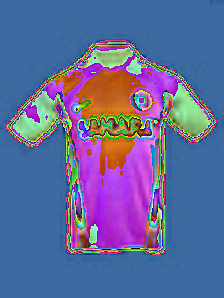

In [50]:
# image = Image.open(data_path + "archive.zip (Unzipped Files)/images/1164.jpg").convert('RGB')  # Open the image and convert to RGB
# image_tr = tr(image)  # Apply the transformations
# img = tf.ToPILImage()(image_tr)
# display(img)

In [62]:
# transformed_images = []
# i = 0
# for image_path in files:
#     image = Image.open(data_path + 'archive.zip (Unzipped Files)/images/' + image_path).convert('RGB')  # Open the image and convert to RGB
#     transformed_image = tr(image)  # Apply the transformations
#     transformed_images.append(transformed_image)
#     i += 1
#     image.close()
#     if (i % 1000 == 0):
#       print(i)

KeyboardInterrupt: 

In [61]:
# images_tr = apply_transformations(files, tr)

KeyboardInterrupt: 

In [66]:
# image_path = data_path + 'archive.zip (Unzipped Files)/images/'

In [68]:
# image = Image.open(image_path + files[0]) # Open the image and convert to RGB


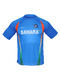

In [12]:
# import os
# from zipfile import ZipFile
# from io import BytesIO


# zip_file_path = os.path.join(data_path, "archive.zip")  # Full path to the ZIP file
# image_path_in_zip = "images/1163.jpg"  # Path to the image inside the ZIP file

# # Open the ZIP file
# with ZipFile(zip_file_path, 'r') as zip_ref:
#     # Extract the image from the ZIP file
#     with zip_ref.open(image_path_in_zip) as file:
#         # Open the image using PIL
#         img = Image.open(BytesIO(file.read()))

#         # Display the image
#         display(img)


In [ ]:
# def extract_features(img):
#   img_array = np.array(img)
#   img_array_with_batch = np.expand_dims(img_array, axis=0)
#   result = model.predict(img_array_with_batch).flatten() #is the return a tensor?
#   norm_result = result /  torch.norm(result, p=2).item()
#   print(img_array_with_batch.shape)

In [ ]:
# extract_features(img)

NameError: name 'img' is not defined

In [1]:
from io import BytesIO

def process_images_from_zip(zip_path, folder_in_zip):
    images_tensor_list = []

    with zipfile.ZipFile(zip_path, 'r') as zip_ref:
        for file_info in zip_ref.infolist():
            if file_info.filename.startswith(folder_in_zip) and file_info.filename.endswith(('.png', '.jpg', '.jpeg')):
                with zip_ref.open(file_info) as file:
                    image = Image.open(BytesIO(file.read())).convert('RGB')
                    image_tensor = tr(image)  # Apply the transformations
                    images_tensor_list.append(image_tensor)

                    # Liberar memoria
                    image.close()

    # Convert list of tensors to a single tensor
    images_tensor = torch.stack(images_tensor_list)
    return images_tensor


In [ ]:
zip_path = data_path + 'archive.zip'
folder_in_zip = 'images/'

images = process_images_from_zip(zip_path, folder_in_zip)


In [7]:
def apply_transformations(images, transform):
    transformed_images = []
    i = 0
    for image in images:
        transformed_image = transform(image)
        transformed_images.append(transformed_image)
        i += 1
        if (i % 1000):
          print(i)

    # Convert list of tensors to a single tensor
    images_tensor = torch.stack(transformed_images)
    return images_tensor


In [ ]:
images = apply_transformations(images, tr)

Se han truncado las últimas 5000 líneas del flujo de salida.
3530
3531
3532
3533
3534
3535
3536
3537
3538
3539
3540
3541
3542
3543
3544
3545
3546
3547
3548
3549
3550
3551
3552
3553
3554
3555
3556
3557
3558
3559
3560
3561
3562
3563
3564
3565
3566
3567
3568
3569
3570
3571
3572
3573
3574
3575
3576
3577
3578
3579
3580
3581
3582
3583
3584
3585
3586
3587
3588
3589
3590
3591
3592
3593
3594
3595
3596
3597
3598
3599
3600
3601
3602
3603
3604
3605
3606
3607
3608
3609
3610
3611
3612
3613
3614
3615
3616
3617
3618
3619
3620
3621
3622
3623
3624
3625
3626
3627
3628
3629
3630
3631
3632
3633
3634
3635
3636
3637
3638
3639
3640
3641
3642
3643
3644
3645
3646
3647
3648
3649
3650
3651
3652
3653
3654
3655
3656
3657
3658
3659
3660
3661
3662
3663
3664
3665
3666
3667
3668
3669
3670
3671
3672
3673
3674
3675
3676
3677
3678
3679
3680
3681
3682
3683
3684
3685
3686
3687
3688
3689
3690
3691
3692
3693
3694
3695
3696
3697
3698
3699
3700
3701
3702
3703
3704
3705
3706
3707
3708
3709
3710
3711
3712
3713
3714
3715
3716
3717

In [ ]:
print(images)